In [204]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [205]:
import matplotlib.pyplot as plt
import numpy as np

from mbench.intervention.efficacy import Converter_2022
from mbench.util import np_looper

import matplotlib.pyplot as plt

In [206]:
converter = Converter_2022(verbose=True)
x = np.linspace(0, 1, 300)

/Users/sepmein/Dropbox/benchmarking/mbench/mbench/intervention/efficacy/converter.py:358: RuntimeWarning: divide by zero encountered in double_scalars
  ((1 - mortality_bioassay) / self.alpha1) ** power)


Text(0, 0.5, 'mortality pyrethroid bioassay')

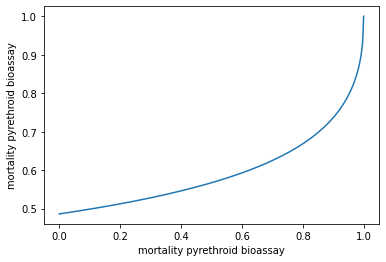

In [207]:
mortality_pyrethroid_hut_trail = [converter.mortality_bioassay_to_hut_trail(_) for _ in x]
plt.plot(x, mortality_pyrethroid_hut_trail)
plt.xlabel("mortality pyrethroid bioassay")
plt.ylabel("mortality pyrethroid bioassay")

Text(0, 0.5, 'mortality PBO hut trail')

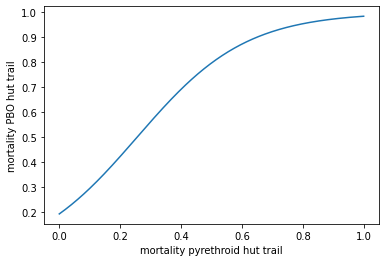

In [208]:
mortality_pbo_hut_trail = [converter.mortality_hut_trail_from_pyrethroid_to_pbo(_) for _ in x]
plt.plot(x, mortality_pbo_hut_trail)
plt.xlabel("mortality pyrethroid hut trail")
plt.ylabel("mortality PBO hut trail")

Text(0.5, 0, 'mortality hut trail')

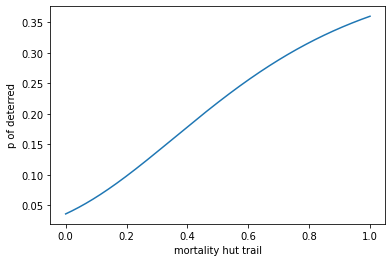

In [209]:
p_of_deterred = [converter.ratio_of_mosquitoes_entering_hut_to_without_net(_) for _ in x]
plt.plot(x, p_of_deterred)
plt.ylabel("p of deterred")
plt.xlabel("mortality hut trail")

Text(0.5, 0, 'mortality hut trail')

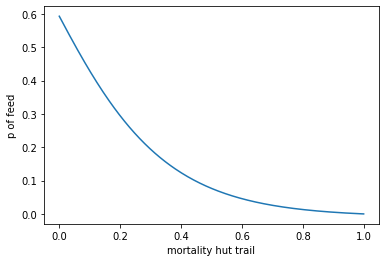

In [210]:
p_of_feed = [converter.proportion_of_mosquitoes_successfully_feed_upon_entering(_) for _ in x]
plt.plot(x, p_of_feed)
plt.ylabel("p of feed")
plt.xlabel("mortality hut trail")

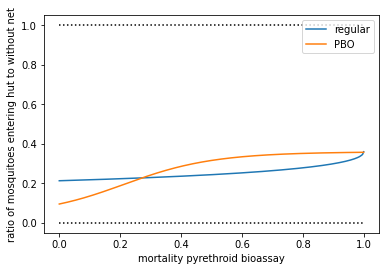

In [211]:
p_entering_regular_ratio =  [
    converter.ratio_of_mosquitoes_entering_hut_to_without_net(_) for _ in mortality_pyrethroid_hut_trail
]

p_entering_pbo_ratio = [
    converter.ratio_of_mosquitoes_entering_hut_to_without_net(_) for _ in mortality_pbo_hut_trail
]

plt.plot(x, p_entering_regular_ratio)
plt.plot(x, p_entering_pbo_ratio)
plt.xlabel("mortality pyrethroid bioassay")
plt.ylabel("ratio of mosquitoes entering hut to without net")
plt.legend(
    labels=['regular', 'PBO'],
    loc='best'
)
plt.hlines(1.0, 0, 1, colors='k', linestyles='dotted')
plt.hlines(0.0, 0, 1, colors='k', linestyles='dotted')
plt.show()

In [212]:
r10 = []
r11 = []
d10 = []
f10 = []
r20 = []
r21 = []
d20 =[]
f20 = []
for _ in np.nditer(x):
    ((_r10, _r11, _d10, _f10), (_r20, _r21, _d20, _f20), *others) = converter.bioassay_to_rds(_)
    r10.append(_r10)
    r11.append(_r11)
    d10.append(_d10)
    f10.append(_f10)
    r20.append(_r20)
    r21.append(_r21)
    d20.append(_d20)
    f20.append(_f20)

r10 = np.array(r10)
r11 = np.array(r11)
d10 = np.array(d10)
f10 = np.array(f10)
r20 = np.array(r20)
r21 = np.array(r21)
d20 = np.array(d20)
f20 = np.array(f20)
# ((r10, r11, d10, f10), (r20, r21, d20, f20)) = ((1,2,3,4),(1,2,3,4))

/Users/sepmein/Dropbox/benchmarking/mbench/mbench/intervention/efficacy/converter.py:358: RuntimeWarning: divide by zero encountered in double_scalars
  ((1 - mortality_bioassay) / self.alpha1) ** power)


Text(0.5, 1.0, 'Relationships between Mortality in pyrethroid bioassay and efficacy in pyrethroid hut trial')

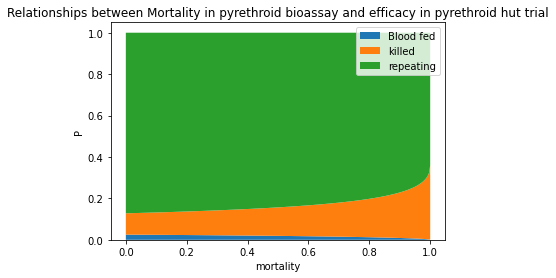

In [213]:
plt.stackplot(x, f10, d10, r10, labels=['f','d','r'])
plt.xlabel('mortality')
plt.ylabel('P')
plt.legend(['Blood fed','killed', 'repeating'])
plt.title('Relationships between Mortality in pyrethroid bioassay and efficacy in pyrethroid hut trial')

Text(0.5, 1.0, 'Relationships between Mortality in pyrethroid bioassay and efficacy in PBO hut trial')

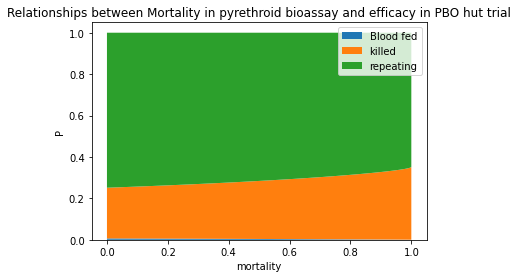

In [214]:
plt.stackplot(x, f20, d20, r20, labels=['f','d','r'])
plt.xlabel('mortality')
plt.ylabel('P')
plt.legend(['Blood fed','killed', 'repeating'])
plt.title('Relationships between Mortality in pyrethroid bioassay and efficacy in PBO hut trial')

In [217]:
converter.bioassay_to_rds(mortality_pyrethroid_bioassay=.8)

((0.8020099958358833, 0.24, 0.1855764773841595, 0.012413526779957202),
 (0.6862646161536372,
  0.2400000000142572,
  0.31154899265494046,
  0.0021863911914223066),
 (0.8,
  0.6685568040973143,
  0.2786279239408464,
  0.031142087614421055,
  0.3003011082882646,
  0.805044350418648,
  0.008677055219190084,
  0.18627859436216185),
 (None,
  0.9100231892388442,
  0.3425786036695378,
  0.004461129289552557,
  0.08551568147160327,
  0.686717239080853,
  0.001528287442804192,
  0.3117544734763428))

In [216]:
converter.proportion_of_mosquitoes_successfully_feed_upon_entering(0)

0.5926831093294891